In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import copy
import imageio

In [2]:
import os
os.chdir('h:/')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
#np.linalg.norm
def euclidean_distance(p1,p2):
    
    assert len(p1)==len(p2),"p1 and p2 should be the same dimension"
    
    temp=sum([i**2 for i in np.subtract(p1,p2)])
    
    return temp**0.5

In [5]:
def get_accuracy(class_):

    d={}

    for i in df['type'][df['label']==class_].unique():
        d[i]= df['type'][df['label']==class_].tolist().count(i)

    temp=-1
    lbl=None
    for i in d:
        if d[i]>temp:
            lbl=i
            temp=d[i]

    return len(df['type'][df['label']==class_][df['type']!=lbl])

In [6]:
#create random centroids
def random_centroid(x):
    
    centroid=[]
    
    for i in x:
        rdnum=rd.randint(int(min(x[i])*100),
                         int(max(x[i])*100))/100
        centroid.append(rdnum)
        
    return centroid

In [7]:
def kmeans(x,knum=3,itrlimit=50):
    
    #create random centroids
    centroids=[]
    for j in range(knum):

        centroid=random_centroid(x)

        while centroid in centroids:
            centroid=random_centroid(x)

        centroids.append(centroid)

    converge=False
    counter=0
    
    
    while not converge:
        
        #calculate distance
        labels=[]
        for i in range(len(x)):
            point=x.loc[i].tolist()

            distance=[]

            for j in centroids:

                distance.append(euclidean_distance(point,j))

            labels.append(distance.index(min(distance)))

        df['label']=labels
        
        #visualization
        ax=plt.figure().add_subplot(111)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.scatter(x['dimension 1'],x['dimension 2'],
                    c=labels,alpha=0.2,s=50,label='clusters')
        plt.scatter([i[0] for i in centroids],
                    [i[1] for i in centroids],
                    c=list(set(labels)),
                   s=200,marker='*',
                    edgecolors='k',
                   label='centroids')


        plt.ylabel('Dimension 2')
        plt.xlabel('Dimension 1')
        plt.title('K Means')
        plt.legend(loc='lower right')

        plt.savefig('kmeans%d.png'%(counter))
        plt.show()
        
        #check if converged
        centroids_prev=copy.deepcopy(centroids)
        centroids=[]

        for i in range(knum):

            if x[df['label']==i].empty:

                centroid=random_centroid(x)
                while centroid in centroids:
                    centroid=random_centroid(x)
                centroids.append(centroid)
            else:
                centroids.append(np.mean(x[df['label']==i]).tolist())    

        counter+=1
        if centroids==centroids_prev or counter>=itrlimit:
            converge=True
    
    #print accuracy
    erreur=0

    for i in range(knum):
        erreur+=get_accuracy(i)

    accuracy=1-erreur/len(df)

    print('accuracy: %s'%(accuracy))
    
    #create gif
    filenames=['kmeans%d.png'%(i) for i in range(counter)] 
    images=list(map(lambda filename:imageio.imread(filename),
                    filenames))
    imageio.mimsave('kmeans.gif',images,duration=0.8)
    
    return

In [8]:
def skl_kmeans(x,n=3):
    
    clf=KMeans(n)
    clf.fit(x)
    label_pred = clf.labels_



    erreur=0

    for i in range(len(set(clf.labels_))):
        erreur+=get_accuracy(i)

    accuracy=1-erreur/len(df)

    print('accuracy: %s'%(accuracy))

In [9]:
df=pd.read_csv('iris.csv')

In [10]:
x=pd.concat([df['sepal length'], \
                 df['sepal width'], \
                 df['petal length'],\
                 df['petal width']],axis=1)

In [11]:
x=PCA(n_components=2).fit_transform(x)

In [12]:
x=pd.DataFrame(x,columns=['dimension 1','dimension 2'])

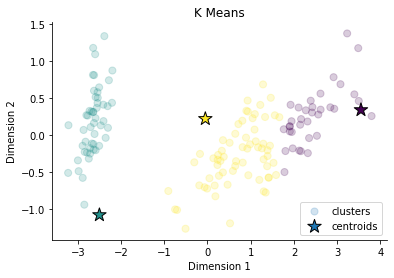

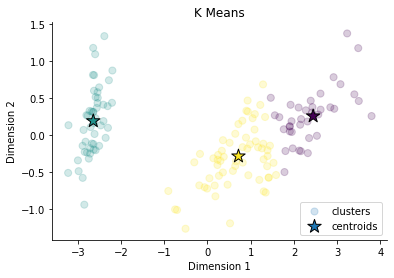

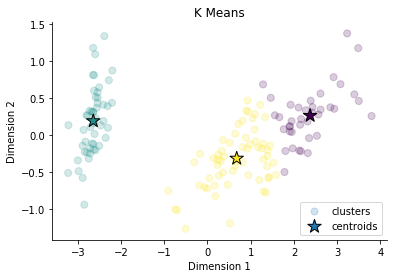

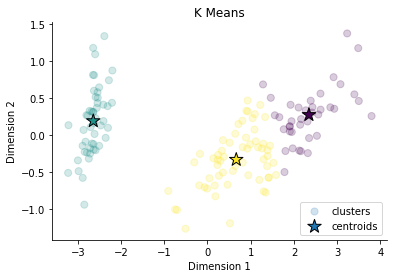

accuracy: 0.8866666666666667


In [13]:
kmeans(x)

In [14]:
skl_kmeans(x)

accuracy: 0.8866666666666667


![alt text](./preview/kmeans.gif)